In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml("mnist_784")

X, y = dataset["data"], dataset["target"]

In [3]:
type(dataset), type(["data"]), type(["target"])

(sklearn.utils.Bunch, list, list)

In [4]:
X = X / 255.0

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

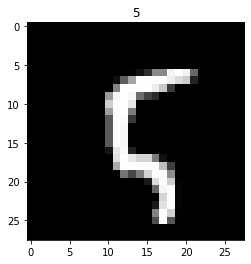

In [7]:
i = 100
img_1 = X[i,:].reshape(28,28)
plt.imshow(img_1, cmap='gray')
plt.title(y[i])
plt.show()

In [8]:
y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [9]:
m = 60000
m_test = X.shape[0] - m
X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [10]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

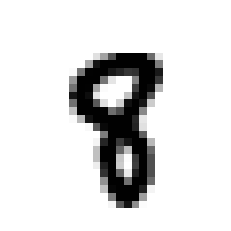

[0.]


In [11]:
i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [12]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [18]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)
print("Final cost:", cost)

Epoch 0 cost:  0.6780408776417199
Epoch 100 cost:  1.707702321793259e-05
Epoch 200 cost:  1.6788160315145835e-05
Epoch 300 cost:  1.650965188565313e-05
Epoch 400 cost:  1.6240936067121687e-05
Epoch 500 cost:  1.598149145160827e-05
Epoch 600 cost:  1.5730833482190306e-05
Epoch 700 cost:  1.5488511229804493e-05
Epoch 800 cost:  1.5254104504150481e-05
Epoch 900 cost:  1.5027221258817598e-05
Epoch 1000 cost:  1.480749525615645e-05
Epoch 1100 cost:  1.4594583961953193e-05
Epoch 1200 cost:  1.4388166643867842e-05
Epoch 1300 cost:  1.4187942650918764e-05
Epoch 1400 cost:  1.3993629854148822e-05
Epoch 1500 cost:  1.3804963231070154e-05
Epoch 1600 cost:  1.3621693578608543e-05
Epoch 1700 cost:  1.3443586341087436e-05
Epoch 1800 cost:  1.3270420541402652e-05
Epoch 1900 cost:  1.3101987804895029e-05
Final cost: 1.2939708593494615e-05


In [20]:
Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]
print(confusion_matrix(predictions, labels))

[[10000]]


In [21]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [16]:
y.shape

(1, 70000)

In [13]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [14]:
Y_new.shape

(10, 70000)

In [15]:
Y_new[:,100]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
y[0, 100]

0.0

In [18]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

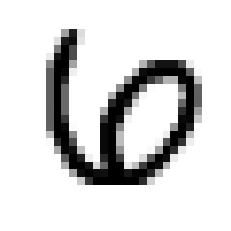

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [20]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [21]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  3.3896793714192603
Epoch 100 cost:  7.85532386579428e-06
Epoch 200 cost:  7.628141002125057e-06
Epoch 300 cost:  7.413738773680805e-06
Epoch 400 cost:  7.211075632121528e-06
Epoch 500 cost:  7.019219485806465e-06
Epoch 600 cost:  6.837333763303451e-06
Epoch 700 cost:  6.664665544840003e-06
Epoch 800 cost:  6.5005354134370405e-06
Epoch 900 cost:  6.344328742798788e-06
Epoch 1000 cost:  6.195488190825712e-06
Epoch 1100 cost:  6.053507209131032e-06
Epoch 1200 cost:  5.91792441209868e-06
Epoch 1300 cost:  5.788318676013348e-06
Epoch 1400 cost:  5.664304860429699e-06
Epoch 1500 cost:  5.5455300618649165e-06
Epoch 1600 cost:  5.431670324274159e-06
Epoch 1700 cost:  5.322427742890989e-06
Epoch 1800 cost:  5.217527907710218e-06
Epoch 1900 cost:  5.116717641223152e-06
Final cost: 5.02071417747627e-06


In [22]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[10000]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

